# A Double Pendulum in Golf

By Audrey Lee and Mahima Beltur

In [1]:
%matplotlib inline
from modsim import *
from numpy import *
import matplotlib.pyplot as plt
import scipy.integrate as integrate

## Question:

### What lengths and masses of a golf club maximizes the amount of Kinetic Energy being transferred from a back swing to a front swing?

We wanted to determine whether or not having a longer or heavier golf club would increase the Kinetic Energy of the swing. After researching, we noticed that a golf swing is similar to a double pendulum, and decided to model the swing after that. Since a double pendulum is only predictable for the first half cycle of its movement, we chose to model the corresponding segment of a golf swing-- up to the point of contact with the golf ball. In this model we are considering the human arm to be the first pendulum and the golf club to be the second.

Our model and question went through a few iterations. Initially, we were going to make the approach of different starting angles and see which starting angle would maxmize the amount of Kinetic Energy transferred. However, we realized that model would be too trivial because the potential energy would increase with a larger starting angle, so the maximum kinetic energy would in a pendulum would increase with larger starting angles. Because potential energy has a higher value when the mass is higher, the biggest angle would result in the maximum kinetic energy. So we decided to keep the initial angle constant and sweep through different variables in the initial state instead:

In [2]:
G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg
th1 = 181.0 #angle for pendulum 1 in degrees
w1 = 0.0  #angular velocity for pendulum 1 in degrees/s
th2 = -0.10 #angle for pendulum 2 in degrees
w2 = 0.0  #angular velocity for pendulum 2 in degrees/s
KE2 = []

init = State(th1=th1, w1=w1, th2=th2, w2=w2, KE2=KE2)

We set our `State` objects as values of the initial angles for both the first  and second leg of the double pendulum, as well as the initial angular velocities of both of those legs. We found that this was the first unrealistic facet of our model. We were unable to get the pendulum in motion on the force of gravity alone. This could, in part, be associated with the force on the golf swing applied by the player, a factor we have not considered, depending on what it is set to. But this might be a bit of a stretch.

We also set Global variables here to be constants that would guide the rest of the pendulum's motion after it began.

## Model: Modeling the Golf Swing as a Double Pendulum

#### Schematic Diagram

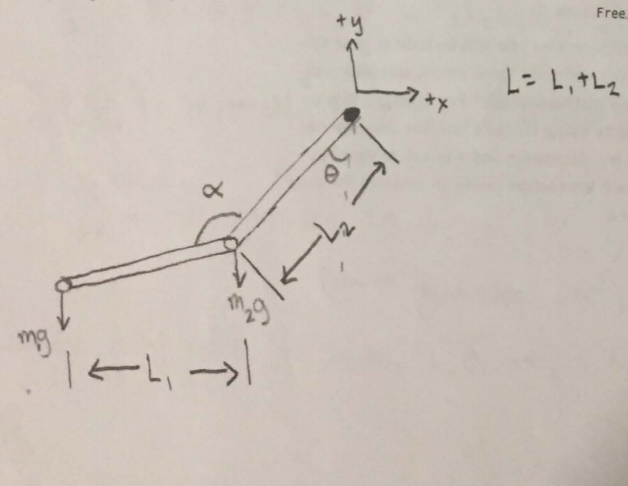

##### Figure 1

This figure is the schematic diagram of our model. The masses are point masses and the length of the pendulums do not have masses in order to simplify the model. The angle alpha for the second pendulum is dependent on the first pendulum's angle: theta. The total length of the first and second pendulum (the human arm and golf club, respectively) is L1 + L2.

### Implementation in Python

#### Differential Equations 

The first step in modelling the pendulum was to establish our differential equations that would map our motion. The differential equations we used were for angular velocity and angular acceleration of the double pendulum. We had our returned values be under the variable name `dydx`.

In [3]:
def derivs(state, t):

    dydx = zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)**2
    
    dydx[1] = (M2*L1*(state[1])**2*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*(state[3])**2*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    
    dydx[3] = (-M2*L2*(state[3])**2*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*(state[1])**2*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    
    return dydx

#### Updating Position
The `dophysics` function is used to update the position of the pendulum balls by changing their positions on the x,y axis. The ode integrator solves the differential functions defined in `derivs` and finds the pendulums' new angles, which are then converted into x and y coordinates.

In [1]:
def dophysics(G,L1,L2,M1,M2,t):
    """
    This function runs the ODE integrator and interprets the results
    
    """
    dt = .01
    time = arange(0.0, t, dt)
    # initial state
    global state
    state = array([th1, w1, th2, w2])*pi/180.
    # integrate  
    global y,x1,y1,x2,y2
    y = integrate.odeint(derivs, state, time)

    x1 = L1*sin(y[:,0])
    y1 = -L1*cos(y[:,0])

    x2 = L2*sin(y[:,2]) + x1
    y2 = -L2*cos(y[:,2]) + y1
    
    return x1, y1, x2, y2, y

## Results 1: The Movement of the Arm (Pendulum 1) and Golf Club (Pendulum 2)

The first two graphs produced below depict the position of both the first and second pendulum on a Cartesian plane. This shows the general, chaotic movement of the double pendulum before we contrain the time to show only the model of a golf swing.

In [5]:
results = []
for mass in range(1,10):
    M2 = mass
    results += [dophysics(G,L1,L2,M1,M2,20)]

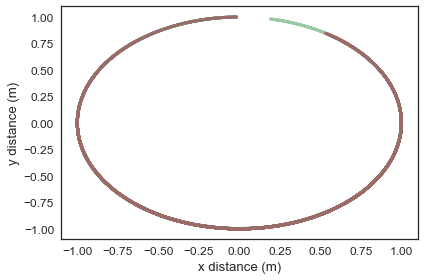

In [6]:
for Results in range(len(results)):
    plot(results[Results][0], results[Results][1])
    decorate(xlabel='x distance (m)', ylabel='y distance (m)')

#### Figure 2

This figure plots multiple cycles of pendulum one's movements for 20 seconds. There are many colors layered on top of each other (although it's not very noticable), and it represents different starting masses of pendulum 2.

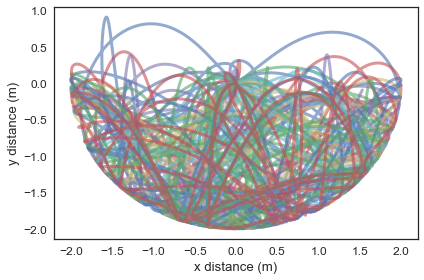

In [7]:
for Results2 in range(len(results)):
    plot(results[Results2][2], results[Results2][3])
    decorate(xlabel='x distance (m)', ylabel='y distance (m)')

#### Figure 3

This figure plots multiple cycles of pendulum two's movements for 20 seconds. Again, there are many colors layered on top of each other because each color represents different masses. The masses are 1 through 10 kilograms. The jumbled paths represent one of many possible paths, which is why the double pendulum is often reffered to as the chaos machine.

The following two plots show the movements of each part of the double pendulum when restricted to 1.37 seconds, which is slightly longer than the golf shot we are measuring. 

In [8]:
dophysics(G,L1,L2,M1,M2,1.37);

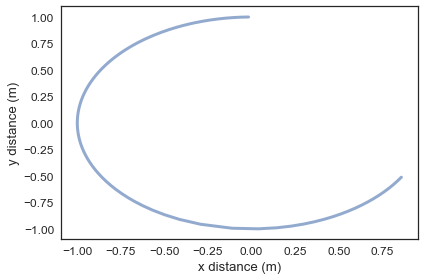

In [9]:
plot(x1,y1)
decorate(xlabel='x distance (m)', ylabel='y distance (m)')

#### Figure 4

This figure plots the first pendulum's swing up to the point of pendulum two's contact with the golf ball. The mass and lengths are constant.

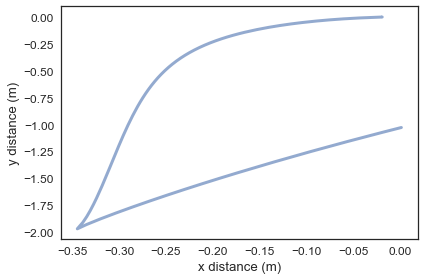

In [10]:
plot(x2,y2)
decorate(xlabel='x distance (m)', ylabel='y distance (m)')

#### Figure 5

This figure plots pendulum two's swing up to the point of its contact with the golf ball. There is a slight innacuracy with the shape of the second pendulum that was unexpected, but is due to the second assumption we made, which ignores the rigities present in the system of a human swinging a golf club.

### Results 2: Kinetic Energy for Different Masses and Lengths

#### Kinetic Energy over time depending on mass

In [11]:
#Calculating Kinetic Energy for each different mass
def KineticEnergyM(state, t):
    
    '''Takes the new input values of mass2 and inputs it into function dophysics.
    Returns new values to calculate KE with'''
    
    th1, w1, th2, w2, KE2 = state
    States = array([th1, w1, th2, w2])*pi/180
    m2 = []    
    dt = 0.01
    time = arange(0.0, t, dt) 
    l2 =2
            
    for m2_ in range(1,10):
        physics = dophysics(G,L1,l2,M1,m2_,t)
        states2 = physics[4]
        KE2 += [(m2_ / 2 * (L1**2 * w1**2 + l2**2 
                * w2**2 + 2 * L1 * l2* w1 * w2 * cos(th1-th2)))]
        th1 = states2[:,0]
        w1 = states2[:,1]
        th2 = states2[:,2]
        w2 = states2[:,3]
        m2.append(m2_)
    return m2, KE2

In [12]:
m2, KEm = KineticEnergyM(init, 1.37)
maxKEm = max(KEm[1])
#Return the maximum Kinetic Energy
maxKEm #Joules

343.41089294209314

[117]

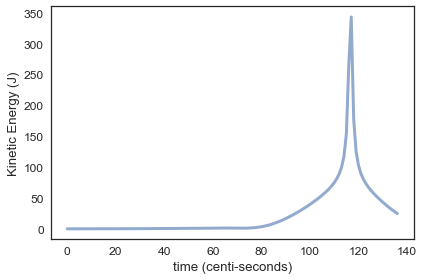

In [13]:
#Plots KE Mass2 of 1 kg over time
plot(KEm[1])
decorate(xlabel='time (centi-seconds)', ylabel='Kinetic Energy (J)')
#Returns value at which maximum KE occurs
[i for i,j in enumerate(KEm[1]) if j == maxKEm] #centi-seconds

#### Figure 6

This figure plots Kinetic Energy vs. time for a swing of the golf club with constant mass and length. The maximum amount of Kinetic Energy is 343.41089 J and it occurs at time 1.17 seconds. This plot only represents the Kinetic Energy over time for the mass of 1 kg. 

Although we also calculated the Kinetic Energy over time for masses of 2 to 9 kg, the plots looked exactly the same and had the same results as the 1 kg mass except with slightly higher values of the maximum Kinetic Energy as the mass increased.

#### Kinetic Energy over time depending on length

In [14]:
#Calculating Kinetic Energy for each different pendulum 2 length
def KineticEnergyL(state, t):
    
    '''Takes the new input values of L2, subtracts it from totalHeight to calculate new L1, 
    and inputs both into function dophysics.
    Returns new values to calculate KE with'''
    
    th1, w1, th2, w2, KE2 = state
    States = array([th1, w1, th2, w2])*pi/180
    m2 = 2
    l2 = []
    
    dt = 0.01
    time = arange(0.0, t, dt) 
    totalHeight = 156
    
    for l2_ in range(0,156):
        l1 = totalHeight - l2_
        physics = dophysics(G,l1,l2_,M1,m2,t)
        states2 = physics[4]
        KE2 += [(m2 / 2 * (L1**2 * w1**2 + l2_**2 
                * w2**2 + 2 * L1 * l2_ * w1 * w2 * cos(th1-th2)))]
        l2.append(l2_)
        th1 = states2[:,0]
        w1 = states2[:,1]
        th2 = states2[:,2]
        w2 = states2[:,3]
        l2.append(l2_)
    return l2, KE2

In [15]:
l2, KEl = KineticEnergyL(init, 1.37)
#Returns the maximum Kinetic Energy
maxKEl = max(KEl[1])
maxKEl #Joules

343.41089294209314

[117]

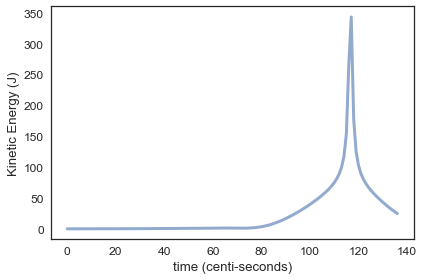

In [16]:
#Plots the KE Length over time
plot(KEl[1])
decorate(xlabel='time (centi-seconds)', ylabel='Kinetic Energy (J)')
#Returns the time at which maximum KE occurs
[i for i,j in enumerate(KEl[1]) if j == maxKEl]

#### Figure 7

This figure plots Kinetic Energy vs. time for a single golf swing with a constant mass and length of the pendulum. The maximum amount of Kinetic Energy is 343.41089 J and it occurs at time 1.17 seconds. This plot only represents the Kinetic Energy over time for the length2 of 1 meter. 

Although we also calculated the Kinetic Energy over time for length2 of 0 m to 155 m, the plot looked exactly the same and had the same results as the 1 m length of pendulum 2 except with slightly higher values for the maximum kinetic energy as the length increased.

This plot also looks the same as the KE over time plot for the masses.

### Results 3: Kinetic Energy Versus the Different Masses and Lengths at Time of Impact

Next, we decided to calculate the Kinetic Energy for each of the different masses and lengths when the club actually hits the golf ball. Since we noticed that the maximum KE occurred before time of impact, we decided to try and find out what the KE is at time of impact for different masses and lengths of the golf club.

#### KE at contact vs. mass

In [17]:
KinEn = []
for num in range(1,9):
    if num != 3:
        KinEn.append(KEm[num][-1])
        num += 1
    else:
        num +=1

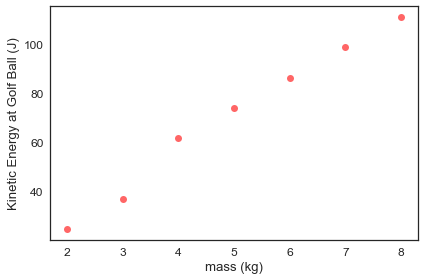

In [18]:
#KE's against masses
m = m2[1:8]
plot(m, KinEn, 'ro')
decorate(xlabel='mass (kg)', ylabel='Kinetic Energy at Golf Ball (J)')

#### Figure 8 

This figure plots the Kinetic Energy (at the time of contact with the golf ball) for each mass. The linear trend just shows that the higher the mass of the golf club we use, the more kinetic energy the swing will produce.

#### KE at contact vs. length

In [19]:
KinetEn = []
number = 0
for number in range(1,9):
    if number != 3:
        KinetEn.append(KEl[number][-1])
        number += 1
    else:
        number +=1

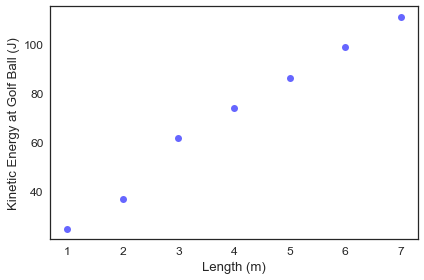

In [20]:
#Max KEs against length
l = [] 
for num in range(1,8): 
    #Removes duplicates
    if num not in l: 
         l.append(num) 
    
plot(l, KinetEn, 'bo')
decorate(xlabel='Length (m)', ylabel='Kinetic Energy at Golf Ball (J)')

#### Figure 9 

This figure plots the Kinetic Energy (at the time of contact with the golf ball) for each length of pendulum 2. The linear trend just shows that the higher the length of golf club we use, the more kinetic energy the swing will produce.

## Interpretation

Based on the data from Results 3, the heaviest mass and longest golf club will maximize the amount of Kinetic Energy from a backswing to a frontswing. However, based on the data in Results 3, changing the mass or the length of the golf club seperately does not have a different effect. 

The only limitation posed by the results of this model is human physiology. While swinging with an 80 kg golf club would give you a lot of kinetic energy during impact, a human might not be able to lift that, rendering the golf club useless. The same applies for the length of the club-- a golfer would not be able to lift and use a club longer than the distance between the ground and their hands effectively, or even at all. 

We have iterated and improved on our model during the project. We initially started with trying to find the optimal angle at which to achieve the maximum KE in a swing, but then realized after consulting with Professor Chris Lee that the optimal angle would be the angle at which the masses of the pendulum are at their highest. He then suggested to us to focus on the mass and lengths of the second pendulum. We decided to focus on that, and were able to discover that changing the mass of the golf club is the same as changing the length. Looking to the future, it would be of interest to take on this project from a different perspective and try to optimize the golf club itself. We could consider the angle of the club head, its length and weight to optimize the player's shots with regards to their height and strength. 

### Assumptions
The model was made with two main assumptions in mind, that have already been mentioned throughout the essay. The first is that the only force acting on the swing is gravity. This makes the model highly inaccurate as it completely ignores the force applied by the player, which would significantly increase both the initial angular velocity and angular acceleration of the club.

The second major assumption was that there were no limitations to the movement of the pendulum. Humans have a limited range of motion in their joints and wrists, which also come with a high amount of friciton. By ignoring these rigitities we have opened up the pendulum to a larger range of motion, which is why the second pendulum's path of motion looks somewhat unusual. Because of this, the model is no longer representing a real swing, but a hypothetical one.